## 2D FT of two slits: Exercise

Two dimensional aperture arrays provide an excellent test of many optics concepts including **interference** and **diffraction**.

Alternatively, as the **Fraunhofer diffraction** pattern is proportional to a **Fourier transform** of the aperture function,
we can view this as an exercise in understanding the properties of Fourier transforms, including scaling, symmetry, translation, etc.

This notebook constructs an aperture array, and calculates the corresponding 2D Fourier transform (or Fraunhoger diffraction pattern).
We repeat for 12 different input arrays and plot
the correspond Fourier images in a random order below. Every time you run the code, it will choose a different combination!


The task for the student is to match the input array letter (A to L) to their Fourier image (numbered 1 to 12).



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True

from numpy.fft import fft, fft2, ifft, fftshift

This cell defines our selection of aperture shapes. Here we use a slit with aspect ratio 1:20. The free parameter is the slit width a and rotation angle.

In [2]:
def Shapes(x,y,x0,y0,a,rotation):    
    b = 20 * a
    theta = rotation * np.pi/180
    xa = (x-x0)*np.cos(theta) + (y-y0)*np.sin(theta)
    ya = (y-y0)*np.cos(theta) - (x-x0)*np.sin(theta)
    shape = (xa > (-a/2)) & (xa < (a/2)) & (ya > (-b/2)) & (ya < (b/2))        
    return shape

This function defines the input aperture function. In this case two slits with angles given by rotations, width a and the spacing between d.

In [3]:
def Input_Image(rotations,a,d):
    screen = 100
    xmin = -screen/2 
    xmax = screen/2
    ymin = -screen/2 
    ymax = screen/2
    dx = 0.05
    dy = 0.05
    X, Y = np.mgrid[xmin:xmax:dx,ymin:ymax:dy]
    x_pts, y_pts = np.shape(X)

    InputImage = np.zeros((x_pts,y_pts))
    for slit in range(0,2):
        x_pos = (2*slit-1)*d/2
        y_pos = 0
        InputImage += Shapes(X,Y,x_pos,y_pos,a,rotations[slit])
    return np.clip(InputImage,0,1)  

This cell is only used for visualisation. It allows us to zoom in on the image (input data) and specifies what colour we want. We can set the brightness in each RGB channel using the parameter gain.

In [4]:
def RGB_zoom_data(data,gain,zoom):
    x_pts, y_pts  = np.shape(data) 
    xc, yc = int(x_pts/2), int(y_pts/2)
    xz, yz = int(x_pts/(2*zoom)), int(y_pts/(2*zoom))
    R = np.zeros((x_pts,y_pts))
    G = np.zeros((x_pts,y_pts))
    B = np.zeros((x_pts,y_pts))
    R += 0.99*data
    G += 0.0*data
    B += 0.99*data
    R=np.clip(gain[0]*R,0.0,1.0)
    G=np.clip(gain[1]*G,0.0,1.0)
    B=np.clip(gain[2]*B,0.0,1.0)
    RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
    RGBzoom = RGB[xc-xz:xc+xz,yc-yz:yc+yz]
    return RGBzoom

This cell does a 2D Fourier transform of the input data. We normalise the result and use a Gamma factor to enhance the less intense regions.
It calls RGZ_zoom_data, so if you want to change the magnification of the Fourier images, change the value of zoom here.

In [5]:
def Fourier_Image(InputImage): # InputData needs 3 channels
    F=fftshift(fft2(InputImage))
    Fr=F.real
    Fi=F.imag
    F2 = Fr*Fr+Fi*Fi
    F2 /=np.max(F2)
    Gamma = 0.4
    GAF2 = F2**Gamma
    zoom = 4
    FourierImage = RGB_zoom_data(GAF2,[1.5,1.5,1.5],zoom)
    return FourierImage

This cell simply adds arrows and labels to the plots.

In [6]:
def plotting_function(ax_ref1,ax_ref2,plot_label,x_axis_label,y_axis_label):
    fs = 36
    axs[ax_ref1,ax_ref2].text(zoom_x_pts/20,zoom_x_pts/7,plot_label,fontsize = fs, color='white')
    axs[ax_ref1,ax_ref2].text(6*zoom_x_pts/20, 18.5*zoom_x_pts/20,x_axis_label,fontsize = fs, color='white')
    axs[ax_ref1,ax_ref2].text(1.5*zoom_x_pts/20, 14*zoom_x_pts/20,y_axis_label,fontsize = fs, color='white')

    axs[ax_ref1,ax_ref2].set_axis_off()
    arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                            head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1,ax_ref2].add_patch(arrow)
    arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                            head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1,ax_ref2].add_patch(arrow)

This cell makes a selection of rotations.  The random.choice of the fig_num allows us to re-order
the Fourier images to provide a matching test for students and instructors. Each time you run this cell it will make a new selection.

In [7]:
num = 12

rotations=np.zeros((2,12))

rotations[:,0] = [0, 0]
rotations[:,1] = [0, 10]
rotations[:,2] = [10, 0]
rotations[:,3] = [-10, 0]
rotations[:,4] = [-10, 10]
rotations[:,5] = [-30, 30]
rotations[:,6] = [-45, 45]
rotations[:,7] = [-60, 60]
rotations[:,8] = [-75, 75]
rotations[:,9] = [-75, 90]
rotations[:,10] = [0, 90]
rotations[:,11] = [90, 0]
                   

fig_num = np.arange(0,num,1)

selected_fig_order = np.random.choice(fig_num, size = num, replace = False)

titles = ['A','B','C','D','E','F','G','H','I','J','K','L']
ftitles = ['1','2','3','4','5','6','7','8','9','10','11','12']

This cell makes a plot.

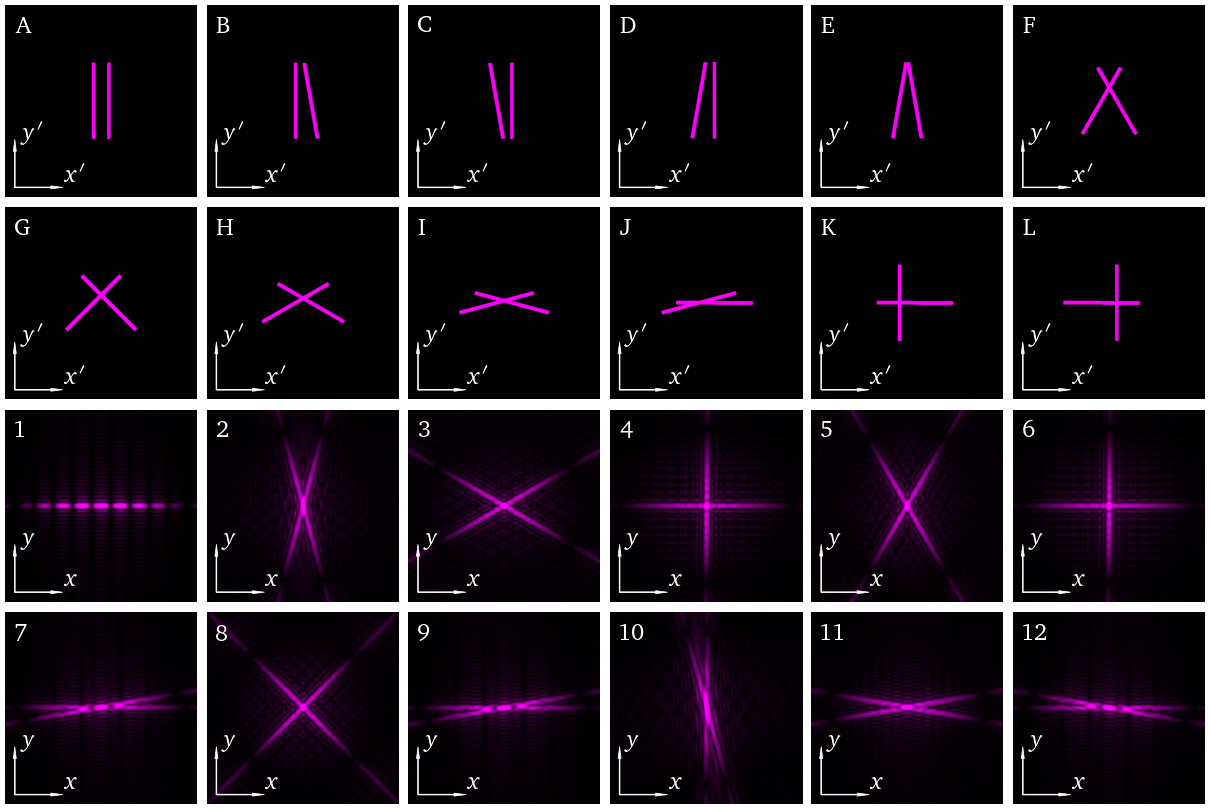

In [8]:
cols = 6
rows = 4
fig, axs = plt.subplots(rows,cols, figsize = (4*cols,4*rows),dpi=50)


a = 0.5
d = 2
for example in range(0,num):
    InputImage = Input_Image(rotations[:,example],a,d)
    ImageData = RGB_zoom_data(InputImage,[1.0,1.0,1.0],4.0)
    ax1_ref = int(fig_num[example]/6)
    ax2_ref = fig_num[example] - int(fig_num[example]/6) *6
    axs[ax1_ref,ax2_ref].imshow(ImageData)
    zoom_x_pts, zoom_y_pts, channels  = np.shape(ImageData)
    plotting_function(ax1_ref,ax2_ref,titles[example],"$x'$","$y'$")

    FImage = Fourier_Image(InputImage)
    zoom_x_pts, zoom_y_pts, channels  = np.shape(FImage)
    ax1_ref = int(selected_fig_order[example]/6)
    ax2_ref = selected_fig_order[example] - int(selected_fig_order[example]/6) *6
    axs[2+ax1_ref,ax2_ref].imshow(FImage)    
    plotting_function(2+ax1_ref,ax2_ref,ftitles[ax1_ref*cols+ax2_ref],"$x$","$y$")   
#    plotting_function(2+ax1_ref,ax2_ref,ftitles[example],"$x$","$y$") # SOLUTION LABELS 

plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.05,hspace=0.05)


In [9]:
fig.savefig('DSlitExercise.png',bbox_inches='tight')

If you want to save the solution it is printed out in this cell but remember if you run the random.choice cell again it will create a new
arrangement.

In [10]:
#Solution
for example in range(0,num):
    print (titles[example],selected_fig_order[example]+1)

A 1
B 7
C 9
D 12
E 11
F 3
G 8
H 5
I 2
J 10
K 6
L 4


At this level of detail, B and C, and K and L are indistinguishable.